In [513]:
using LinearAlgebra, FFTW

# Discrete Fourier Transform 

> @djuric2018cooperative 의 Chap. 8.3 의 내용중 일부를 요약함. 

## Cyclic shfit operator ${\bf B}$

The matrix ${\bf B}$ representing the periodic shift is 

In [511]:
B= [0 0 0 0 1
    1 0 0 0 0 
    0 1 0 0 0
    0 0 1 0 0
    0 0 0 1 0]

5×5 Matrix{Int64}:
 0  0  0  0  1
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0

This matrix is the cyclic shift.

*note*: ${\bf B}$ is orthogonal matrix.

In [477]:
B'B

5×5 Matrix{Int64}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

(ex1) Define ${\bf s}$ as 

In [478]:
s = [1,2,3,4,5]
s

5-element Vector{Int64}:
 1
 2
 3
 4
 5

Observe that 

In [481]:
B*s

5-element Vector{Int64}:
 5
 1
 2
 3
 4

In [482]:
B^2*s

5-element Vector{Int64}:
 4
 5
 1
 2
 3

In [483]:
B^3*s

5-element Vector{Int64}:
 3
 4
 5
 1
 2

Thus we can interprete the matrix ${\bf B}$ as cyclic shift operator such that 

$$
{\bf B}s_n =s_{n-1}
$$ 

for $n=1,\dots, N-1$ and ${\bf B}s_0 =s_N$. 

*note:* ${\bf B}$는 시계열에서 다루는 backshift operator 와 비슷함. 

## DFT

The matrix ${\bf B}$ can be expressed as 

${\bf B}={\bf DFT}^\ast \cdot {\bf \Lambda} \cdot {\bf DFT}$

where ${\bf DFT}$ is unitary and symmetric matrix and $\bf \Lambda$ is diagonal matrix.

In [484]:
λ, Ψ = eigen(B)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
5-element Vector{ComplexF64}:
 -0.8090169943749472 - 0.5877852522924725im
 -0.8090169943749472 + 0.5877852522924725im
 0.30901699437494734 - 0.9510565162951536im
 0.30901699437494734 + 0.9510565162951536im
  0.9999999999999998 + 0.0im
vectors:
5×5 Matrix{ComplexF64}:
  0.138197+0.425325im   0.138197-0.425325im  …  0.447214+0.0im
 -0.361803-0.262866im  -0.361803+0.262866im     0.447214+0.0im
  0.447214-0.0im        0.447214+0.0im          0.447214+0.0im
 -0.361803+0.262866im  -0.361803-0.262866im     0.447214+0.0im
  0.138197-0.425325im   0.138197+0.425325im     0.447214+0.0im

In [486]:
B ≈ Ψ * Diagonal(λ) * Ψ'

true

Define ${\boldsymbol \Psi}^\ast={\bf DFT}$.

In [487]:
DFT = Ψ'

5×5 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
  0.138197-0.425325im  -0.361803+0.262866im  …  0.138197+0.425325im
  0.138197+0.425325im  -0.361803-0.262866im     0.138197-0.425325im
 -0.361803-0.262866im  -0.361803+0.262866im     0.138197-0.425325im
 -0.361803+0.262866im  -0.361803-0.262866im     0.138197+0.425325im
  0.447214-0.0im        0.447214-0.0im          0.447214-0.0im

Note that the eigenvalues are not ordered in julia.

In [488]:
λ[5], exp(-im* 2π/5 * 0)

(0.9999999999999998 + 0.0im, 1.0 - 0.0im)

In [489]:
λ[3], exp(-im* 2π/5 * 1)

(0.30901699437494734 - 0.9510565162951536im, 0.30901699437494745 - 0.9510565162951535im)

In [490]:
λ[1], exp(-im* 2π/5 * 2)

(-0.8090169943749472 - 0.5877852522924725im, -0.8090169943749473 - 0.5877852522924732im)

In [491]:
λ[2], exp(-im* 2π/5 * 3)

(-0.8090169943749472 + 0.5877852522924725im, -0.8090169943749475 + 0.587785252292473im)

## Spectral components and Frequencies 

We remark: 

**(1) Spectral components**: For $k = 0,1,2,\dots, N-1$, the $k$-th column of ${\bf DFT}^\ast$ is defined by 

$$\Psi_k:=\frac{1}{\sqrt{N}}\begin{bmatrix} 1 \\ e^{j\frac{2\pi}{N}k} \\ e^{j\frac{2\pi}{N}2k} \\ e^{j\frac{2\pi}{N}3k} \\  \dots \\ e^{j\frac{2\pi}{N}(N-1)k} \end{bmatrix}.$$

Note that $\Psi_k$ can be also interpreted as $\ell$-th eigenvector of ${\bf A}$ correspoding $\lambda_\ell = e^{-j\frac{2\pi}{N}k}$. Those eigenvectors 

$$\big\{{\bf 1},\Psi_1,\Psi_2, \dots, \Psi_{N-1}\big\}$$

form a complete orthonomal basis of $\mathbb{C}^N$. These vectors are called spectral components. 

**(2) Frequencies:** The diagonal entries of ${\bf \Lambda}$ are the eigenvalues of the time shift ${\bf B}$. In Physics and in operator theory, these eigenvalues are the frequencies of the signal. In DSP it is more common to call frequencies 

$$\Omega_k=\frac{-1}{2\pi j}\ln\lambda_k=\frac{-1}{2\pi j}\ln e^{-j \frac{2\pi}{N}k}=\frac{k}{N}, \quad k=0,1,2,\dots,N-1.$$

---

The $N$ (time) frequencies $\Omega_k$ are all distinct, positive, equally spaced, and increasing from $0$ to $\frac{N-1}{N}$. The spectral components are the complex exponential sinusiodal functions. For example, corresponding to the zero frequency is the DC spectral component (a vector whose entries are constant and all equal to $\frac{1}{\sqrt{N}}$).

# 내 마음대로 Summary

## DFT 

일반적으로 우리가 알고있는 DFT^[discrete Fourier transform]는 아래와 같다. (이 그림은 [위키피디아](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)에서 캡쳐한 것이다)

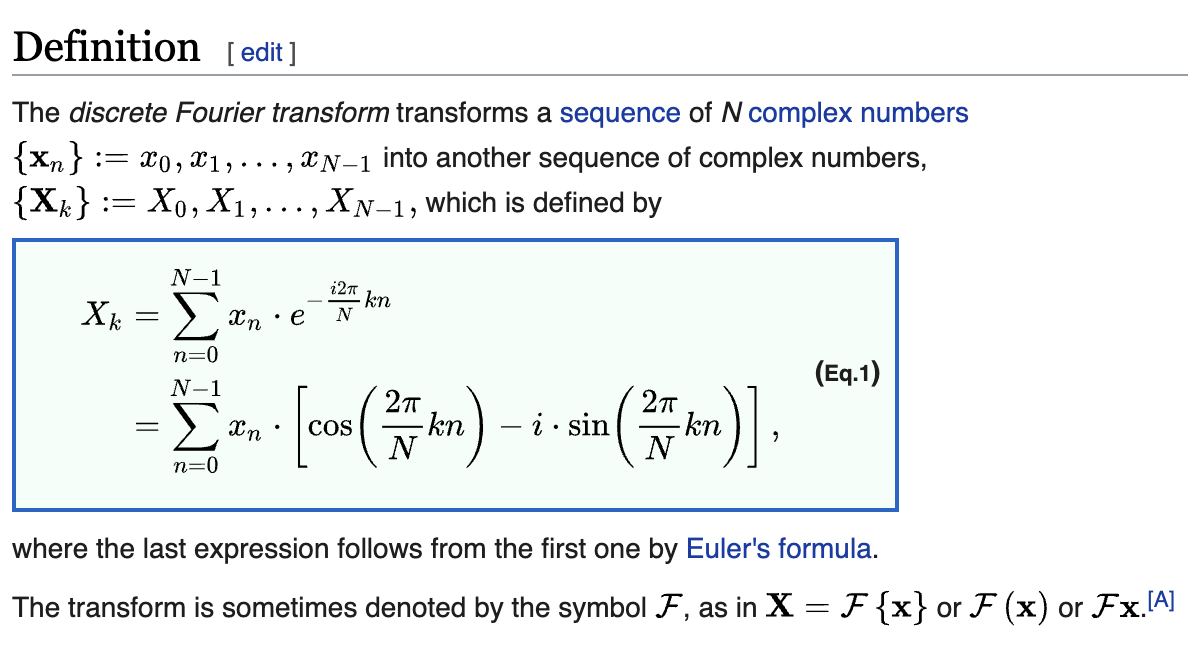

즉 DFT는 임의의 신호 $\{{\bf x}_n\}:=x_0,x_1,\dots,x_{N-1}$를 적당한 규칙^[$X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-i\frac{2\pi}{N}kn}$]에 따라서 $\{{\bf X}_k\}:=X_0,X_1,\dots,X_{N-1}$로 바꾸는 변환을 이라고 이해할 수 있다. 이때 사용되는 적당한 규칙은 구체적으로 아래의 수식을 의미한다. 

$$X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-i\frac{2\pi}{N}kn}$$ 

그런데 매트릭스를 활용하면 위의 수식을 아래와 같이 표현할 수 있다. 

$$\begin{bmatrix} X_1 \\ X_2 \\ X_3 \\ \dots \\ X_{N-1} \end{bmatrix} 
=\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\
1 & e^{-i \frac{2\pi}{N}\cdot 1} & e^{-i \frac{2\pi}{N}\cdot 2} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)}\\
1 & e^{-i \frac{2\pi}{N}\cdot 2} & e^{-i \frac{2\pi}{N}\cdot 4} & \dots & e^{-i \frac{2\pi}{N}\cdot 2(N-1)}\\
\dots & \dots & \dots & \dots & \dots \\ 
1 & e^{-i \frac{2\pi}{N}\cdot (N-1)} & e^{-i \frac{2\pi}{N}\cdot 2(N-1)} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)^2}
\end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \dots \\ x_{N-1} \end{bmatrix}$$

편의상 ${\bf X}$와 ${\bf x}$를 $N \times 1$ col-vec이라고 생각하고 DFT를 아래와 같은 matrix로 정의하자.

$${\bf DFT} = \begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\
1 & e^{-i \frac{2\pi}{N}\cdot 1} & e^{-i \frac{2\pi}{N}\cdot 2} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)}\\
1 & e^{-i \frac{2\pi}{N}\cdot 2} & e^{-i \frac{2\pi}{N}\cdot 4} & \dots & e^{-i \frac{2\pi}{N}\cdot 2(N-1)}\\
\dots & \dots & \dots & \dots & \dots \\ 
1 & e^{-i \frac{2\pi}{N}\cdot (N-1)} & e^{-i \frac{2\pi}{N}\cdot 2(N-1)} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)^2}
    \end{bmatrix}$$

그러면 

$${\bf X} = {\bf DFT} \cdot {\bf x}$$

와 같이 표현할 수 있고 ${\bf x}$에서 ${\bf X}$로 바꾸는 과정을 단순히 ${\bf DFT}$행렬을 ${\bf x}$의 왼쪽에 곱하는 과정으로 이해할 수 있다.

(참고) 사실 아래와 같이 ${\bf DFT}$를 정의하는 버전도 있다. (둘이 혼용해서 쓰인다) 

$${\bf DFT} = \frac{1}{\sqrt{N}}\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\
1 & e^{-i \frac{2\pi}{N}\cdot 1} & e^{-i \frac{2\pi}{N}\cdot 2} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)}\\
1 & e^{-i \frac{2\pi}{N}\cdot 2} & e^{-i \frac{2\pi}{N}\cdot 4} & \dots & e^{-i \frac{2\pi}{N}\cdot 2(N-1)}\\
\dots & \dots & \dots & \dots & \dots \\ 
1 & e^{-i \frac{2\pi}{N}\cdot (N-1)} & e^{-i \frac{2\pi}{N}\cdot 2(N-1)} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)^2}
    \end{bmatrix}$$

---

**예제1** 아래는 위키에서 긁어온 예제이다. 이 예제를 따라가보자.

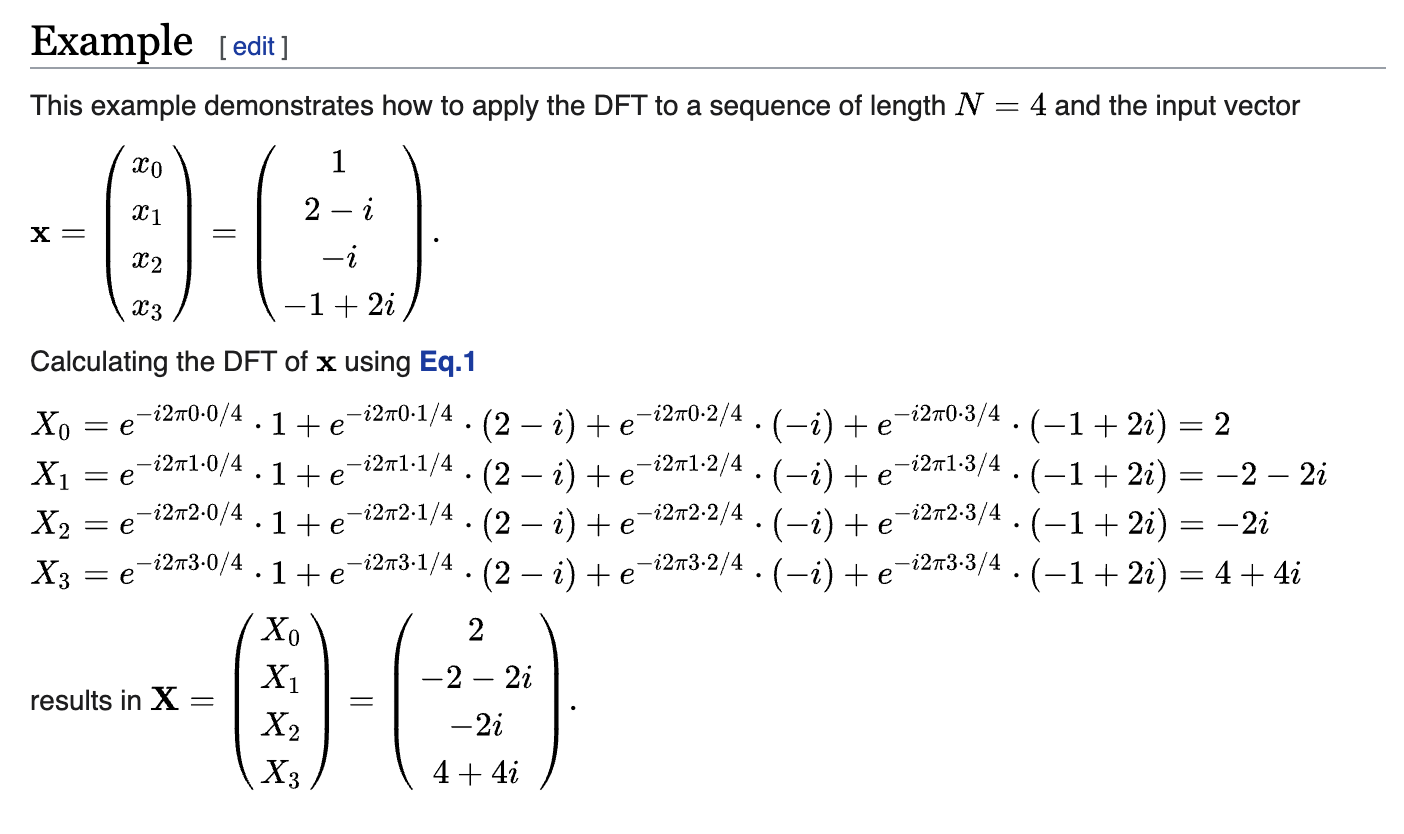

예제를 풀기위해서 우선 아래와 같은 벡터를 선언하다. 

In [514]:
x = [1, 2-im, -im, -1+2im]

4-element Vector{Complex{Int64}}:
  1 + 0im
  2 - 1im
  0 - 1im
 -1 + 2im

(풀이1) 

$4\times 4$의 크기를 가지는 DFT행렬을 선언한다. 

(step1) 아래의 매트릭스 생성 

In [515]:
_DFT = reshape([i*j for i in 0:3 for j in 0:3], (4,4))
_DFT

4×4 Matrix{Int64}:
 0  0  0  0
 0  1  2  3
 0  2  4  6
 0  3  6  9

(step2) `_DFT`의 각 원소에 함수 $f: x \to \exp(-i\frac{2\pi}{4}x)$를 취함 

In [516]:
f = x -> exp(-im * (2π/4) * x)
DFT = _DFT .|> f

4×4 Matrix{ComplexF64}:
 1.0-0.0im           1.0-0.0im          …           1.0-0.0im
 1.0-0.0im   6.12323e-17-1.0im             -1.83697e-16+1.0im
 1.0-0.0im          -1.0-1.22465e-16im             -1.0-3.67394e-16im
 1.0-0.0im  -1.83697e-16+1.0im              5.51091e-16-1.0im

이제 ${\bf X}$를 구하면 아래와 같다. 

In [517]:
DFT * x

4-element Vector{ComplexF64}:
                   2.0 + 0.0im
   -1.9999999999999998 - 2.0000000000000004im
 8.881784197001252e-16 - 1.9999999999999998im
    3.9999999999999987 + 4.000000000000001im

위키의 답이 잘 나옴

(풀이2)

참고로 아래와 같이 패키지를 이용하여 구할 수도 있다. 

In [518]:
fft(x)

4-element Vector{ComplexF64}:
  2.0 + 0.0im
 -2.0 - 2.0im
  0.0 - 2.0im
  4.0 + 4.0im

## Inverse DFT

앞으로는 ${\bf DFT}$를 아래와 같이 정의하자. 

$${\bf DFT} = \frac{1}{\sqrt{N}}\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\
1 & e^{-i \frac{2\pi}{N}\cdot 1} & e^{-i \frac{2\pi}{N}\cdot 2} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)}\\
1 & e^{-i \frac{2\pi}{N}\cdot 2} & e^{-i \frac{2\pi}{N}\cdot 4} & \dots & e^{-i \frac{2\pi}{N}\cdot 2(N-1)}\\
\dots & \dots & \dots & \dots & \dots \\ 
1 & e^{-i \frac{2\pi}{N}\cdot (N-1)} & e^{-i \frac{2\pi}{N}\cdot 2(N-1)} & \dots & e^{-i \frac{2\pi}{N}\cdot (N-1)^2}
    \end{bmatrix}$$

${\bf DFT}$행렬에는 몇 가지 특징이 있다. 

**특징1:** 유니터리행렬이다. 즉 ${\bf DFT}^\ast \cdot {\bf DFT} = {\bf DFT}^\ast \cdot{\bf DFT} = {\bf I}$ 이다. 

In [469]:
_DFT = reshape([i*j for i in 0:3 for j in 0:3], (4,4))
f = x -> exp(-im * (2π/4) * x)
DFT = _DFT .|> f
DFT # 아까의 예제의 DFT!

4×4 Matrix{ComplexF64}:
 1.0-0.0im           1.0-0.0im          …           1.0-0.0im
 1.0-0.0im   6.12323e-17-1.0im             -1.83697e-16+1.0im
 1.0-0.0im          -1.0-1.22465e-16im             -1.0-3.67394e-16im
 1.0-0.0im  -1.83697e-16+1.0im              5.51091e-16-1.0im

In [470]:
DFT = (1/√4)*DFT # 새로운 DFT의 정의 
DFT'DFT .|> round # 유니터리행렬임을 확인!

4×4 Matrix{ComplexF64}:
  1.0+0.0im  -0.0-0.0im   0.0-0.0im   0.0-0.0im
 -0.0+0.0im   1.0+0.0im  -0.0-0.0im   0.0-0.0im
  0.0+0.0im  -0.0+0.0im   1.0+0.0im  -0.0-0.0im
  0.0+0.0im   0.0+0.0im  -0.0+0.0im   1.0+0.0im

**특징2:** ${\bf DFT}$는 대칭행렬이다. 따라서 이 행렬의 켤레전치는 DFT의 각 원소에서 단순히 $i=\sqrt{-1}$ 대신에 $-i$ 를 넣은 것과 같다.

특징1-2를 조합하면 아래와 같이 ${\bf DFT}$에서 $i$ 대신에 $-i$를 넣은 행렬이 변환 DFT를 취소시킬 수 있음을 이해할 수 있다. ^[아래의 행렬은 ${\bf DFT}^\ast$ 혹은 ${\bf DFT}$의 conjugate matrix 혹은 ${\bf DFT}^{-1}$로 생각할 수 있음]

$$\frac{1}{\sqrt{N}}\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\
1 & e^{i \frac{2\pi}{N}\cdot 1} & e^{i \frac{2\pi}{N}\cdot 2} & \dots & e^{i \frac{2\pi}{N}\cdot (N-1)}\\
1 & e^{i \frac{2\pi}{N}\cdot 2} & e^{i \frac{2\pi}{N}\cdot 4} & \dots & e^{i \frac{2\pi}{N}\cdot 2(N-1)}\\
\dots & \dots & \dots & \dots & \dots \\ 
1 & e^{i \frac{2\pi}{N}\cdot (N-1)} & e^{i \frac{2\pi}{N}\cdot 2(N-1)} & \dots & e^{i \frac{2\pi}{N}\cdot (N-1)^2}
    \end{bmatrix}$$

행렬 ${\bf DFT}$를 discrete Fourier transform으로 생각했듯이 위의 행렬을 inverse discrete Fourier transform으로 해석할 수 있다. 

## DFT의 또 다른 정의 

이번에는 ${\bf DFT}$에 대한 다른 정의를 생각해보자. 우선 아래와 같은 행렬 ${\bf B}$를 고려하자. 

In [512]:
B= [0 0 0 1 
    1 0 0 0 
    0 1 0 0
    0 0 1 0]

4×4 Matrix{Int64}:
 0  0  0  1
 1  0  0  0
 0  1  0  0
 0  0  1  0

이것은 길이가 4인 임의의 column vector를 아래로 한칸씩 이동시키는 매트릭스이다. 

In [499]:
x = [1, 2-im, -im, -1+2im]

4-element Vector{Complex{Int64}}:
  1 + 0im
  2 - 1im
  0 - 1im
 -1 + 2im

In [500]:
B*x # 아래로 한칸이동 

4-element Vector{Complex{Int64}}:
 -1 + 2im
  1 + 0im
  2 - 1im
  0 - 1im

In [501]:
B^2*x # 아래로 두칸이동, B^2*x = B*(Bx) 이므로 

4-element Vector{Complex{Int64}}:
  0 - 1im
 -1 + 2im
  1 + 0im
  2 - 1im

한편 이 매트릭스 ${\bf B}$는 아래와 같이 고유분해가 가능하다. 

$$ {\bf B} = {\bf \Psi} {\bf \Lambda} {\bf \Psi}^\ast$$

- ${\bf \Psi}$: make $\frac{1}{\sqrt{N}}[e^{\sqrt{-1} \frac{2\pi}{N} ij}~\text{ for }~ i=0,1,2,\dots,N-1~\text{ for }~j=0,1,2,\dots,N-1]$ and apply `reshape` function with $(N,N)$.
- ${\bf \Lambda}$: make $[e^{-\sqrt{-1}\frac{2\pi}{N}i}~\text{ for }~ i=0,1,2\dots,N-1]$ and apply `Diagonal` function. 

In [510]:
N = 4 
λ = [exp(-im * (2π/N) *i) for i in 0:(N-1)]
Λ = Diagonal(λ)
_Ψ = 1/√N *[exp(im * (2π/N) * i*j) for i in 0:(N-1) for j in 0:(N-1)]
Ψ = reshape(_Ψ, (N,N))
B ≈ Ψ * Λ * Ψ'

true

그런데 위에서 정의된 ${\bf \Psi}^\ast$는 우리가 그전에 정의하였던 ${\bf DFT}$의 행렬과 같다. 

In [505]:
_DFT = reshape([i*j for i in 0:3 for j in 0:3], (4,4))
DFT = _DFT .|> (x -> exp(-im * (2π/4) * x)) 
DFT = DFT * 1/√N

4×4 Matrix{ComplexF64}:
 0.5-0.0im           0.5-0.0im          …           0.5-0.0im
 0.5-0.0im   3.06162e-17-0.5im             -9.18485e-17+0.5im
 0.5-0.0im          -0.5-6.12323e-17im             -0.5-1.83697e-16im
 0.5-0.0im  -9.18485e-17+0.5im              2.75546e-16-0.5im

In [506]:
Ψ' == DFT 

true

결국 요약하면 길이가 $N$인 신호의 ${\bf DFT}$행렬은 아래의 과정으로 구할 수 있음을 알 수 있다. 

1. Forward operator ${\bf A}$를 정의한다. 
2. ${\bf A}$의 고유벡터행렬 ${\bf \Psi}$을 구한다. ^[고유벡터행렬은 고유값 $e^{-\sqrt{-1}\frac{2\pi}{N}i}$에 의하여 정렬되어 있어야 함.]
3. ${\bf \Psi}$의 conjugate transpose matrix ${\bf \Psi}^\ast$ 를 구한다. 이것이 ${\bf DFT}$ matrix 이다. ^[사실 이미 대칭행렬이므로 conjugate matrix만 구하면 된다.]

## Spectral component and Frequencies 

${\bf A}$의 고유벡터 ${\bf \Psi}$의 각 column을 spectral component라고 부른다. 

In [507]:
#| output: false
ψ₁ = Ψ[:,1] # ψ₁ is first spectral component 
ψ₂ = Ψ[:,2] # ψ₂ is seconde spectral component 
ψ₃ = Ψ[:,3] # ψ₃ is third spectral component 
ψ₄ = Ψ[:,4] # ψ₄ is last spectral component

4-element Vector{ComplexF64}:
                    0.5 + 0.0im
 -9.184850993605148e-17 - 0.5im
                   -0.5 + 1.8369701987210297e-16im
  2.755455298081545e-16 + 0.5im

그리고 아래와 같은 수열을 $\Omega_{k}=\frac{k}{N}$을 frequency 라고 부른다. 

In [508]:
N=4 
Ω = [k/N for k in 0:(N-1)]
Ω

4-element Vector{Float64}:
 0.0
 0.25
 0.5
 0.75